## Extended exploration of Newton's method. 

Let's go one step further and plot the points in the complex plane where

 1) Newton's method eventually failes, i.e. repeated application of the Newton iterator results in a division by zero. 
 
 2) Newton's method is *periodic*, i.e. repeated application of Newton's method results in a cycle (repetition). 
 
 ## This material is not part of the course, just a continuation of a discussion I've been having with one of the students.  Perhaps you will find it interesting.   If you can improve on any of it, let me know.  The algorithm to find periodic points could be improved. 
 

## Reminder of what we are doing. 

Newton's method to solve for roots of the equation $f(z)=0$, $z$ a complex number. 

Given an equation $f(z)=0$. Newton's idea is to hope that the linearization of the function $f(z)$
at a given approximate solution would have a root which is a better guess for the solutions of
$f(z)=0.$

This is of course not always true, but often-enough it turns out to be
a good idea.

The linearization of $f(z)$ at $z_0$ is the function $f′(z_0)(z−z_0)+f(z_0)$ which has the root $f′(z_0)(z−z_0)+f(z_0)=0$ at $z=z_0−\frac{f(z_0)}{f′(z_0)}$ which becomes our next guess, giving the recursion relation
$$z_{n+1}=z_n−\frac{f(z_n)}{f′(z_n)}$$

The function 
$$g(z) = z - \frac{f(z)}{f'(z)}$$
is called the **Newton Iterator** of $f$. 

$$g(g(z)) = g^{(2)}(z)$$
$$g(g(g(z))) = g^{(3)}(z)$$
is the notation of the **iterates** of $g$. 

For $f(z) = z^3 - 1$ one can check that that $|g(z)| < |z|$ provided $|z| \geq \sqrt{5}$. This means that Newton's method for $f(z)=z^3-1$, provided it is defined for all time, *must have a convergent subsequence*.  One way such a sequence could not converge (provided it exists for all time) would be for it to be periodic. 

This notebook explores the dynamics of the Newton iterator.  We will:

 1) Determine which points in the plane (if we use them as the initial condition for Newtons method with $f(z)=z^3-1$) Newton's method fails.  i.e. the sequence eventually is undefined, due to a division by zero. 
 
 2) We will also compute the periodic points for Newton's method. 

In [1]:
## Newton's method that allows for complex number input.
import sympy as sp
import mpmath as mp

sym_x=sp.Symbol("x")

def OI_Newton( f ):
    g = sym_x - f/sp.diff(f,sym_x)
    return g

Sym_func = sym_x**3 - 1

Newt_Iterator = OI_Newton(Sym_func)

from mpmath import *

mp.dps = 20
mp.prec = mp.dps * 3.34
mp.pretty = True

oPoly = sp.lambdify(sym_x, Sym_func, "mpmath")
NIt = sp.lambdify(sym_x, Newt_Iterator, "mpmath")

## Here is an example of how Newton's method for z^3 - 1 converges to two different
## roots, depending on initial condition.

z = mpc(1.0, 0.5) ## mpc is the mpmath arbitrary-precision complex number floating-point type.
print("Initial condition: ", z)

for i in range(0,5):
    Z = z
    z = NIt(z)
    print(z)

print("Evaluating ", Sym_func, " at ", z, " gives: ", oPoly(z))
    
z = mpc(-1,0.5)
print("Initial condition: ", z)

for i in range(0,5):
    Z = z
    z = NIt(z)
    print(z)

print("Evaluating ", Sym_func, " at ", z, " gives: ", oPoly(z))

print("Both are very close to zero.")

Initial condition:  (1.0 + 0.5j)
(0.8266666666666666667 + 0.12j)
(1.009101293268602287 - 0.05582701123777840886j)
(0.9970913786920296195 - 0.001218678160774645252j)
(1.000006990428805843 + 7.128339109188268049e-6j)
(0.9999999999980538418 + 9.96593837081526383e-11j)
Evaluating  x**3 - 1  at  (0.9999999999980538418 + 9.96593837081526383e-11j)  gives:  (-5.838474709664136231e-12 + 2.989781511232941973e-10j)
Initial condition:  (-1.0 + 0.5j)
(-0.5066666666666666667 + 0.5466666666666666667j)
(-0.3832817777777777778 + 0.9627164444444444444j)
(-0.4810173976123450126 + 0.8551826783058666047j)
(-0.5004900329923770473 + 0.8660135028433907189j)
(-0.50000010998239533 + 0.8660251902444721468j)
Evaluating  x**3 - 1  at  (-0.50000010998239533 + 0.8660251902444721468j)  gives:  (-3.898195859218474063e-7 + 6.060524372235481895e-7j)
Both are very close to zero.


In [2]:
## to make a nice `pixel-style' image we will use the matplotlib imshow
## this routine takes a doublely-indexed arrayes of 3-element (RGB) lists, with 
## the last element a call dtype=float32. 

baseColour = [[1.0, 1.0, 1.0], [0.8, 0.8, 0.8], [0.0, 0.0, 0.0]]

def complexModulus(z):
    return sqrt(re(z * conj(z)))

## function returns a matplotlib imshow image array.
## Ix is a 2-element list of floats. The x-interval.
## Iy is a 2-element list of floats. The y-interval. 
## N is the number of subdivisions requested for Ix and Iy. 
## the array indicate the root Newton's method converges to. 
def rootPlot( Ix, Iy, N ):
    retval = []
    for i in range(N):
        buildline = []
        yc = Iy[0] + (float(i)/float(N))*(Iy[1]-Iy[0])
        for j in range(N):
            xc = Ix[0] + (float(j)/float(N))*(Ix[1]-Ix[0])
            ## Run Newton's Method. 
            z = mp.mpc( xc, yc )
            ## I'm going a little overboard here -- the routine is determined to iterate
            ## **as long as it takes** to find a root.  We know we're close to a root when
            ## z^3 - 1 has small modulus (distance from 0). 
            while (complexModulus(oPoly(z))>0.1):
                   z = NIt(z)
            if (complexModulus(z - mpc(1.0, 0.0))<0.1): buildline.append(baseColour[0])
            if (complexModulus(z - mpc(-0.5, 0.8660254))<0.1): buildline.append(baseColour[1])
            if (complexModulus(z - mpc(-0.5, -0.8660254))<0.1): buildline.append(baseColour[2])
        retval += [buildline]
    return retval        

imgarray = rootPlot( [-2.0, 2.0], [-2.0, 2.0], 1201 )


In [4]:
## eg: prime_factors(500) == [2, 2, 2, 5, 5]
def prime_factors(n):
    """Returns all the prime factors of a positive integer"""
    factors = []
    d = 2
    while n > 1:
        while n % d == 0:
            factors.append(d)
            n /= d
        d = d + 1
        if d*d > n:
            if n > 1: factors.append(n)
            break
    return factors

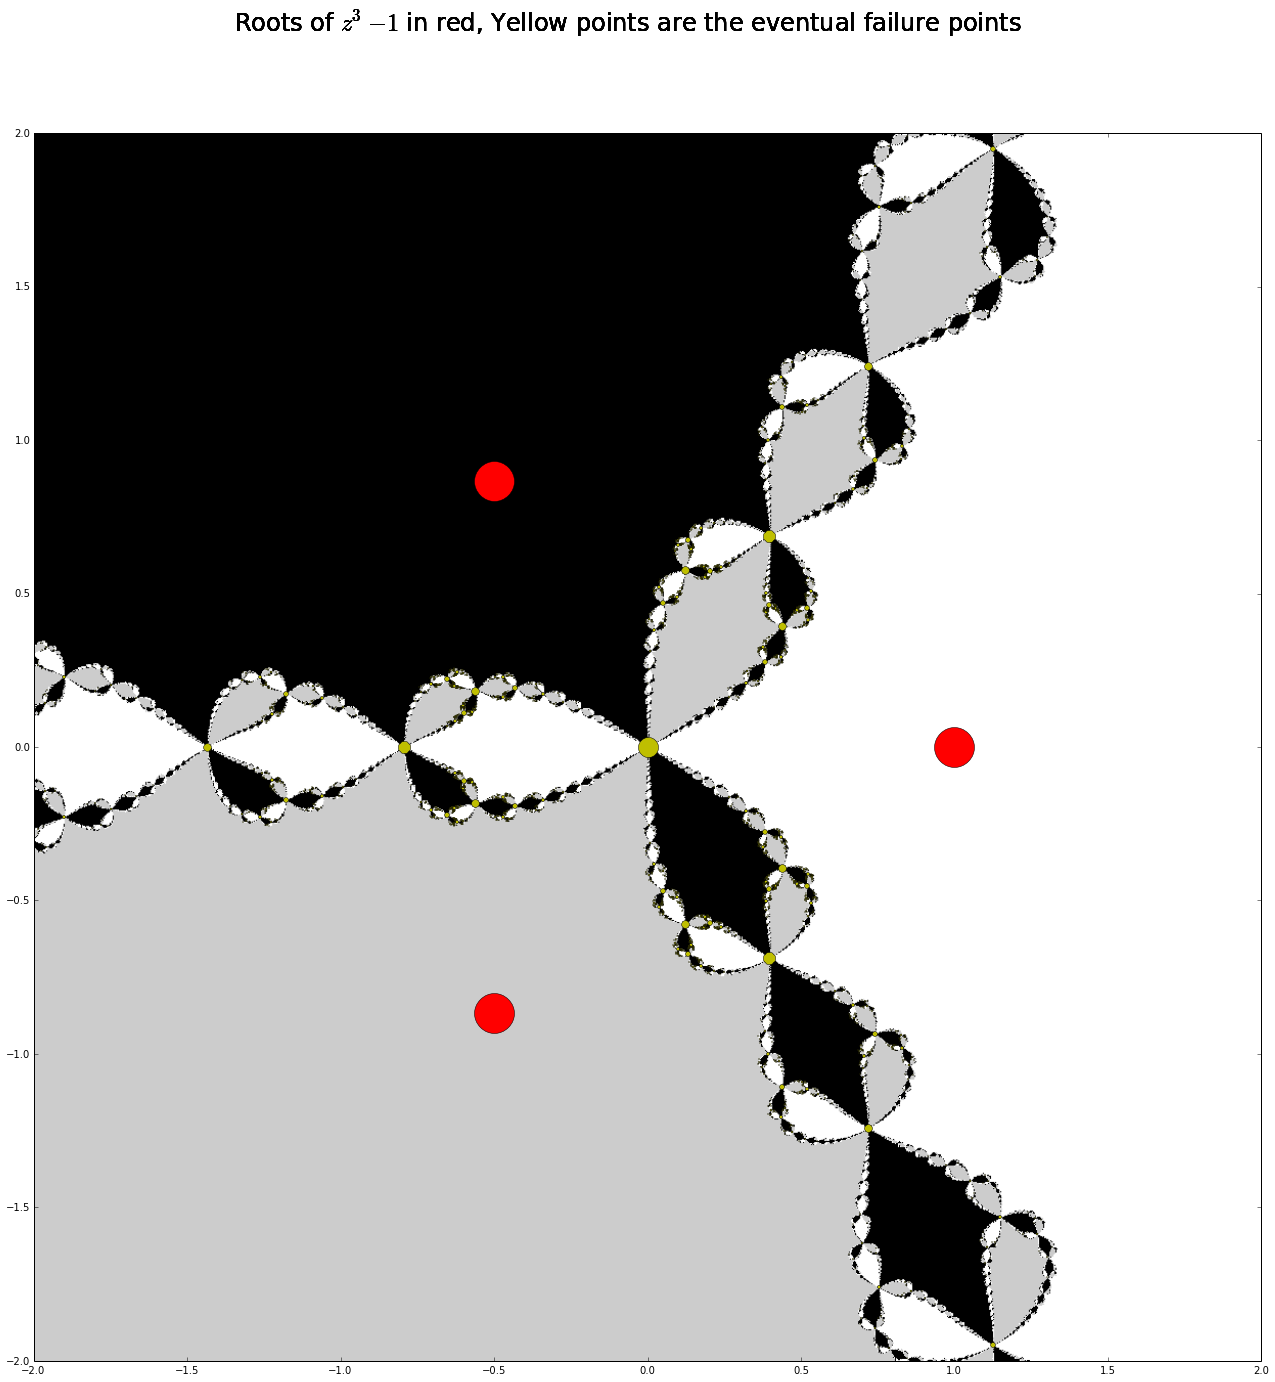

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Plot the basins of attraction in white/gray/black
fig, ax1 = plt.subplots(nrows=1, figsize=(22,22))
imgplot = plt.imshow(imgarray, extent=[-2,2,-2,2], aspect=1.0)

## Plot the roots in red, oversized.
plt.plot([1.0, np.cos(2*np.pi/3), np.cos(2*np.pi/3)], [0.0, np.sin(2*np.pi/3), -np.sin(2*np.pi/3)], 'ro', markersize=40, linewidth=10)

## Compute and plot the points where Newton's method eventually fails, in various size yellow markers.
failpts = [[mp.mpc(0)]]

for i in range(7):
    newList = []
    for z in failpts[-1]:
        P = [2, -3*z, 0, 1]
        newList += mp.polyroots(P, 30)
    failpts += [newList]

for i in range(len(failpts)):
    for j in range(len(failpts[i])):
        failpts[i][j] = np.cfloat(failpts[i][j])
    fL = np.array([z for z in failpts[i] if ( np.real(z) < 2 and np.real(z) > -2 and np.imag(z) < 2 and np.imag(z) > -2)])
    failpts[i] = fL
        
for i in range(len(failpts)):
    ms = 20*(1.6**(-i))
    lw = 0.5*(1.6**(-i))
    plt.suptitle('Roots of $z^3-1$ in red, Yellow points are the eventual failure points', fontsize=24)
    plt.plot(np.real(failpts[i]), np.imag(failpts[i]), 'yo',  markersize=ms, linewidth=lw)

## Let's also plot some of the periodic points, in orange. 

* fixed points (period one) are where $g(z)=z$ 
* points of order two where $g^{(2)}(z)=z$, etc.

To deal with this, observe that we can write $g^k(z)$ as a rational polynomial in $z$.

We can compute a recursion for the numerator and denominator via the observation that
$$g(\frac{a}{b}) = \frac{2a^3+b^3}{3a^2b}.$$  
This lets us turn the equation $g^n(z) = z$ into a polynomial equation, which we can solve numerically.


In [59]:
periodpts = [] ## list of periodic points by order.  We will have order zero empty. 
 ## order 1 will be solutions to g(z)=z, order n will be solutions to g^(n)(z)=z. 
num = np.poly1d([np.float(1), np.float(0)])
den = np.poly1d([np.float(1)])

solpoly = []
for i in range(4):
    num2 = np.polymul(num,num)
    num3 = np.polymul(num2,num)
    den2 = np.polymul(den,den)
    den3 = np.polymul(den2,den)
    num = 2*num3+den3
    den = 3*np.polymul(num2,den)
    temppoly = np.polymul(den, np.poly1d([np.float(1),np.float(0)])) - num
    solpoly += [temppoly]
    # once we get to periodic points of order 4 numpy's algorithm finds lots of false roots.  I suppose that's not
    # too surprising -- there's a lot of roots!  mpmath's root finding algorithm is more robust and flexible. 
    #periodpts += [np.roots(solpoly[i])]
    # Hmm, mpmath's algorithm only gets us up to periodic points of period 5. If we push the range(4) to range(5) I
    #  have not been able to get it to converge. 
    periodpts += [mp.polyroots(solpoly[i].c, maxsteps=100, extraprec=10)]
    
for i in range(len(periodpts)):
    for j in range(len(periodpts[i])):
        periodpts[i][j] = np.cfloat(periodpts[i][j])
    fL = np.array([z for z in periodpts[i] if ( np.real(z) < 2 and np.real(z) > -2 and np.imag(z) < 2 and np.imag(z) > -2)])
    periodpts[i] = fL
    

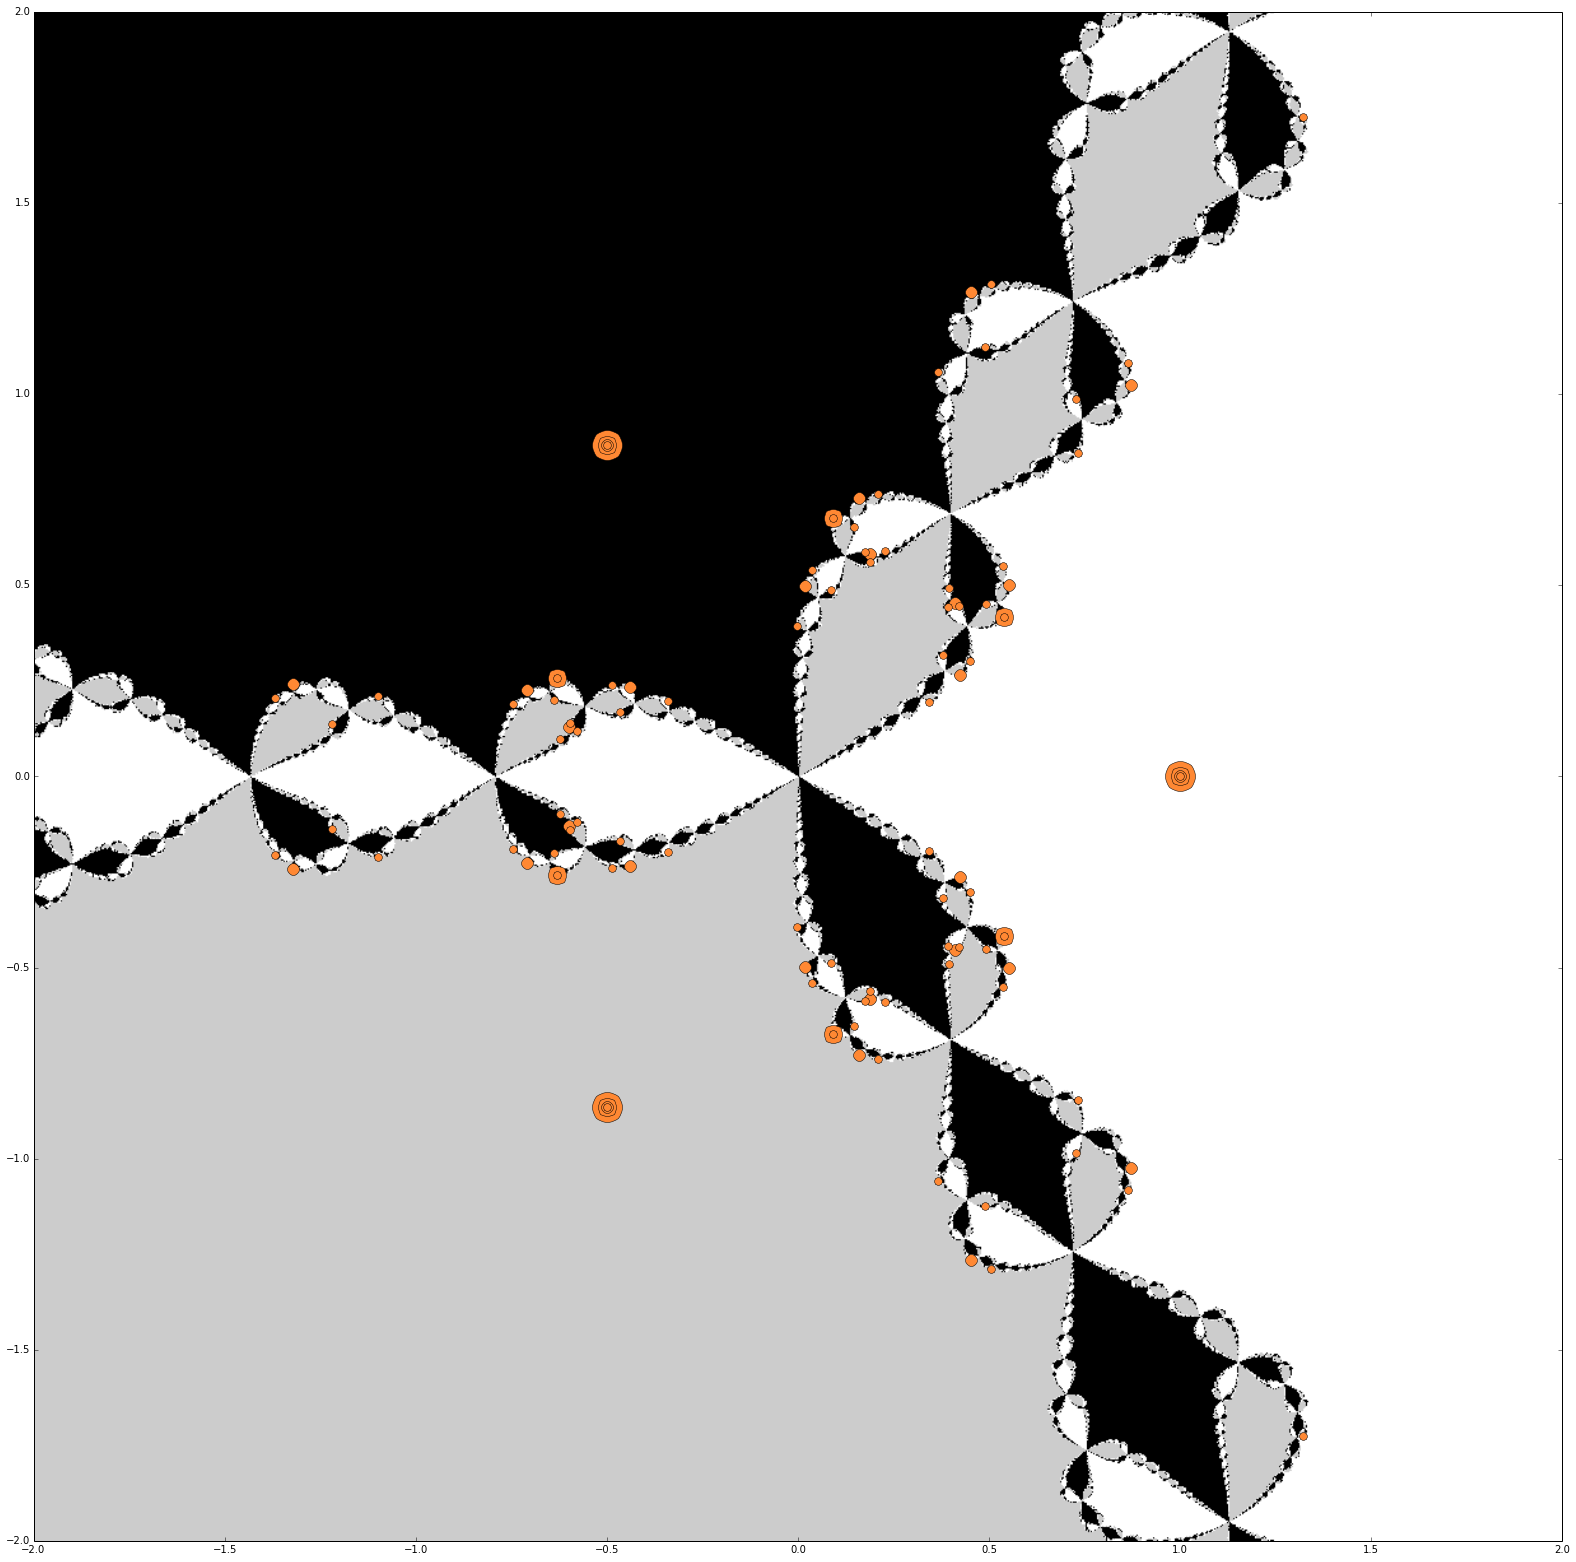

In [60]:
fig, ax1 = plt.subplots(nrows=1, figsize=(22,22))
imgplot = plt.imshow(imgarray, extent=[-2,2,-2,2], aspect=1.0)

for i in range(len(periodpts)):
    ms = 30*(1.6**(-i))
    plt.suptitle('Orange points are the periodic points', fontsize=24)
    plt.plot(np.real(periodpts[i]), np.imag(periodpts[i]), color='#FF8833', marker='o', markersize=ms, linewidth=0)
    
plt.tight_layout()
plt.show()